# TEXT MINING for PRACTICE: Document Clustering
---

In [74]:
#따로 빼 놓은 함수
from nlp import get_data

import pandas as pd
import numpy as np

# 1. 데이터 로딩

In [75]:
documents = get_data("data/article_sample.txt")

In [76]:
df_article = pd.DataFrame(documents, columns = ["label", "source", "datetime", "title", "content"])
df_article.head()

,label,source,datetime,title,content
0,비트코인,ZDNet Korea,2019-04-14 09:58:00,"비트코인 가능성 알려면, 결함 전제로 규제 정비必",금융硏 비트코인 쇠락과 내재적 결함 보고서(지디넷코리아=손예술 기자)대표적인 암호화...
1,비트코인,한국경제,2019-03-09 07:02:00,"워렌 버핏 ""비트코인은 망상"" vs 하버드대 교수 ""망상 아니다""",비트코인 놓고 상반된 평가 내놔[ 김산하 기자 ] 니얼 퍼거슨 하버드대 교수(왼쪽...
2,비트코인,한국경제,2019-04-07 09:02:00,"가상화폐, 94년 인터넷 수준…비트코인캐시가 선두주자 될 것",[코인터뷰] 스테판 러스트 비트코인닷컴 비즈니스총괄[ 김산하 기자 ] 한경닷컴과 ...
3,비트코인,ZDNet Korea,2019-01-03 12:39:00,[비트코인 10주년 ]제네시스 블록 탄생에서 크립토윈터까지,10년 역사 10대 뉴스로 정리(지디넷코리아=임유경 기자)2008년 9월 리먼 브라...
4,비트코인,아시아경제,2019-04-22 11:20:00,"[아시아미래기업포럼]이준행 고팍스 대표 ""비트코인이 금융시스템 혁신""",세상 긍정적 변화시킬 기술아시아경제주최로 22일 서울 중구 대한상의에서 열린 '20...


In [77]:
df_article.tail()

,label,source,datetime,title,content
95,부동산,뉴시스,2019-04-22 11:13:00,"금투협, '부동산금융 법규' 교육과정 개설",【서울=뉴시스】류병화 기자 = 한국금융투자협회 금융투자교육원은 '부동산금융 법규' ...
96,부동산,조선비즈,2019-04-23 06:03:00,"[단독] 금융당국, '부동산 리스' 규제 푼다…中企 돈줄 트일듯","현재는 규정 까다로워 사실상 금지…취급 건수 ‘0’ 중소기업, ‘매각 후 재임대’ ..."
97,부동산,데일리안,2019-03-03 15:17:00,"신영자산·한투부통산·대신자산, 부동산신탁업 예비인가 승인",12개 신청자 가운데 3개사 선정차입형 토지신탁은 2년 간 제한금융위원회가 신영자산...
98,부동산,한겨레,2019-01-28 12:01:00,한국 부자들 “부동산 침체해도 부동산 안 놓겠다”,하나은행 ‘2019 한국부자 보고서’“향후 5년 부동산 정·침체” 84%“부동산 비...
99,부동산,뉴시스,2019-03-12 10:08:00,"금투협, '부동산투자자문인력' 과정 1기 개설",【서울=뉴시스】류병화 기자 = 한국금융투자협회 금융투자교육원은 투자자문사가 부동산투...


In [78]:
df_article.groupby(by="label").count()

,source,datetime,title,content
label,,,,
금리,33,33,33,33
부동산,33,33,33,33
비트코인,34,34,34,34


In [79]:
from nlp import get_nouns

# 2. Tokenization

In [80]:
tokenized_documents = get_nouns(df_article['content'].tolist())
tokenized_documents[:5]

[['금융',
  '비트코인',
  '쇠락',
  '재적',
  '결함',
  '보고서',
  '넷',
  '코리아',
  '손',
  '예술',
  '대표',
  '암호',
  '화폐',
  '비트코인',
  '가격',
  '급',
  '변동',
  '불구',
  '일부',
  '암호',
  '화폐',
  '옹호',
  '론자',
  '비트코인',
  '몇',
  '가지',
  '결함',
  '해소',
  '국면',
  '예측',
  '그',
  '결함',
  '전제',
  '국내외',
  '정부',
  '감독',
  '당국',
  '선제',
  '시각',
  '규제',
  '환경',
  '정비',
  '주장',
  '한국',
  '금융',
  '연구원',
  '비트코인',
  '쇠락',
  '재적',
  '결함',
  '보고서',
  '암호',
  '화폐',
  '옹호',
  '론',
  '입장',
  '그',
  '제시',
  '세',
  '가지',
  '결함',
  '발표',
  '여기',
  '암호',
  '화폐',
  '옹호',
  '론자',
  '암호',
  '화폐',
  '부가가치',
  '낼',
  '사업',
  '모델',
  '등장',
  '가능성',
  '집중',
  '인물',
  '통칭',
  '그',
  '위해',
  '비트코인',
  '세',
  '가지',
  '결함',
  '우선',
  '해소',
  '보고',
  '하나',
  '비트코인',
  '재화',
  '용역',
  '구입',
  '사용',
  '시장',
  '미국',
  '비트코인',
  '시장조사',
  '기관',
  '사토시',
  '캐피탈',
  '리서치',
  '지난',
  '기준',
  '비트코인',
  '사용',
  '거래',
  '결제',
  '액',
  '약',
  '중국',
  '알리페',
  '위챗',
  '페이',
  '거래',
  '결제',
  '액',
  '약',
  '감안',
  '시장',
  '두',
  '번',
  '비트코인',
  '거래',
 

# 3. TF 매트릭스 추출

In [81]:
from nlp import get_tf_matrix

In [82]:
tf_matrix = get_tf_matrix(tokenized_documents)
print(tf_matrix.shape)
tf_matrix

(100, 3479)


,가감,가게,가격,가계,가계부채,가구,가까이,가늠,가능,가능성,...,흐름,흑심,흡수,흥,흥미,희망,희비,희화,히트맵,힘
0,0.0,0.0,0.002994,0.000000,0.0,0.0,0.000000,0.002994,0.000000,0.002994,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.004902,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.012132,0.000000,0.0,0.0,0.001733,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.015385,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.010256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.0,0.006720,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.001344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.008511,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 4. K-means 클러스터링

In [96]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(tf_matrix)

In [98]:
kmeans.cluster_centers_

array([[-1.62630326e-19,  2.93014534e-05,  6.85140036e-03, ...,
         4.19603894e-05,  1.35525272e-20,  6.67735043e-05],
       [ 1.37483425e-03, -1.69406589e-21,  7.96495420e-05, ...,
         0.00000000e+00,  1.35525272e-20,  1.55836060e-04],
       [-1.62630326e-19, -1.69406589e-21,  1.12239338e-03, ...,
         0.00000000e+00,  1.32908028e-04,  3.09222644e-04]])

In [99]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [100]:
from sklearn.manifold import TSNE

In [101]:
X_embedded = TSNE(n_components=2).fit_transform(tf_matrix)
X_embedded.shape

(100, 2)

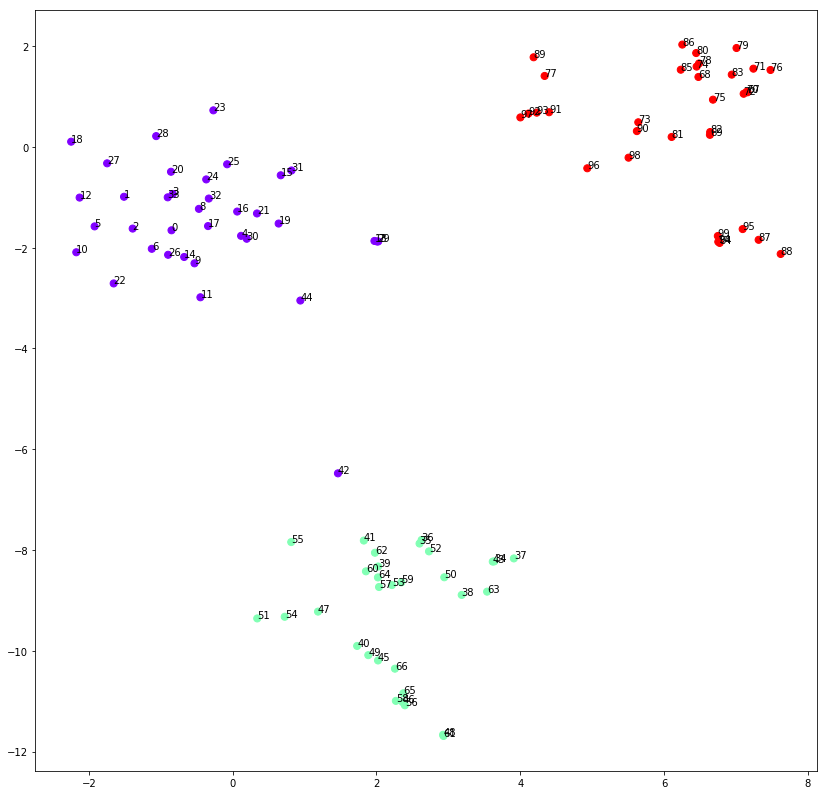

In [102]:
plt.figure(figsize=(14,14))
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=kmeans.labels_, cmap='rainbow' , s=50)
for i in range(X_embedded.shape[0]):
    plt.annotate(tf_matrix.index[i], (X_embedded[i,0],X_embedded[i,1]))

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [92]:
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_embedded)
    silhouette_avg = silhouette_score(X_embedded, kmeans.labels_)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.59894365
For n_clusters = 3 The average silhouette_score is : 0.7296921
For n_clusters = 4 The average silhouette_score is : 0.65984786
For n_clusters = 5 The average silhouette_score is : 0.58570457


In [93]:
from nlp import get_tf_idf_matrix
tf_idf_matrix = get_tf_idf_matrix(tokenized_documents)
tf_idf_matrix

,가감,가게,가격,가계,가계부채,가구,가까이,가늠,가능,가능성,...,흐름,흑심,흡수,흥,흥미,희망,희비,희화,히트맵,힘
0,0.0,0.0,0.004917,0.000000,0.0,0.0,0.000000,0.013818,0.000000,0.005020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.008050,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.019923,0.000000,0.0,0.0,0.006128,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.025265,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.017197,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.0,0.011036,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.002254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.014270,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [105]:
X_embedded = TSNE(n_components=2).fit_transform(tf_idf_matrix)
X_embedded.shape
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_embedded)
    silhouette_avg = silhouette_score(X_embedded, kmeans.labels_)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.9118458
For n_clusters = 3 The average silhouette_score is : 0.41725454
For n_clusters = 4 The average silhouette_score is : 0.44094115
For n_clusters = 5 The average silhouette_score is : 0.37301958


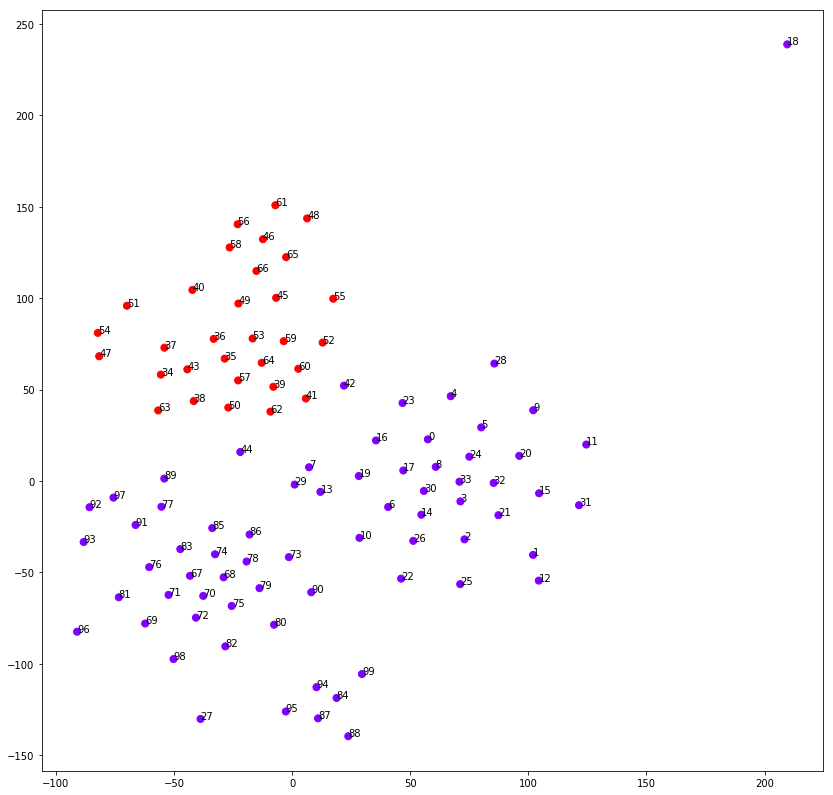

In [106]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(tf_idf_matrix)
X_embedded = TSNE(n_components=2).fit_transform(tf_idf_matrix)
plt.figure(figsize=(14,14))
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=kmeans.labels_, cmap='rainbow' , s=50)
for i in range(X_embedded.shape[0]):
    plt.annotate(tf_idf_matrix.index[i], (X_embedded[i,0],X_embedded[i,1]))